<h3 align="center">Практическая работа №1. Исследование однослойных нейронных сетей на примере моделирования булевых выражений</h3>
<h3 align = "center">Выполнил: Ландызин А.Н. М092101(71) <h3>

### Цель работы:

Цель работы — исследовать функционирование простейшей нейронной сети (НС) на базе нейрона с нелинейной функцией активации и обучить её по правилу Видроу — Хоффа.

### Постановка задачи:

Постановка задачи. Получить модель булевой функции (БФ) на основе однослойной НС (единичный нейрон) с двоичными входами $x_1, x_2, x_3, x_4∈{0, 1}$, единичным входом смещения $x_0=1$, синаптическими весами $w_0, w_1, w_2, w_3,w_4$, двоичным выходом $y∈{0, 1}$ и заданной нелинейной функцией активации (ФА) $f:R→(0, 1)$ 
Для заданной БФ (варианты см. в табл. 1.4) реализовать обучение НС с использованием:

*   всех комбинаций переменных $x_1, x_2, x_3, x_4$;
*   части возможных комбинаций переменных $x_1, x_2, x_3, x_4$;
остальные комбинации являются тестовыми.





## 6 вариант
Параметры:

$x_3x_4+\overline{x_1}+\overline{x_2}$

$AF = f(net) = 1$ if $net >=0 , 0$ if $net < 0 $

$AF = f(net) = 1/2(tanh(net)+1)$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
n = 0.3 #норма обучения

In [ ]:
def Hemming(f1, f2): # возвращает расстояние Хэмминга между наборами  f1 и f2
    e = 0
    for x1, x2 in zip(f1, f2):
        if(x1 != x2) : e += 1
    return e

Расстоя́ние Хэ́мминга (кодовое расстояние) — число позиций, в которых соответствующие символы двух слов одинаковой длины различны. В более общем случае расстояние Хэмминга применяется для строк одинаковой длины любых q-ичных алфавитов и служит метрикой различия (функцией, определяющей расстояние в метрическом пространстве) объектов одинаковой размерности. 

In [ ]:
def F(x): # возвращает результат моделируемой булевой функции
    return int((x[2] and x[3]) or (not x[0]) or (not x[1]))

def Y1(net): # возвращает результат пороговой функции активации
    return 1 if net >= 0 else 0

def Y2(net): # возвращает результат логистической функции активации
    out = 0.5 * (np.tanh(net) + 1)
    return 1 if out >= 0.5 else 0

def DeltaW1(x, q, net): # находит величину, на которую изменятся семантические веса Wi, для ПОРОГОВОЙ функции активации
    return n * q * x

def DeltaW2(x, q, net): # находит величину, на которую изменятся семантические веса Wi, для ЛОГИСТИЧЕСКОЙ функции активации
    return n * q * x * ((-0.5) * (np.tanh(net) ** 2) + 0.5)

def Net(x, w): # находит значение сетевого входа НС
    return sum([w_i * x_i for w_i, x_i in zip(w[1:], x)]) + w[0]


In [ ]:
#производит обучение НС. Возвращает вектор ошибок Е(к) и вектор синаптических коэффициентов, на которых обучилась НС
def LearningNN(X, Y, DeltaW): 
    
    RightF = [F(x_i) for x_i in X] # Результат моделируемой булевой функции по всем элементам x_i в списке Х
    w = [0 for i in range(5)] #задаем синаптические веса нулями
    TryF = [0 for i in range(len(X))] #задаем сеетвые значения нулями
    E = [1] #суммарная ошибка
    k = 0  #эпоха

    while E[k]:
        print("\n\nЭпоха =", k, "\n")
        print("Синаптические веса =", w)
        E.append(0)
        for i in range(len(X)):
            net = Net(X[i], w)
            TryF[i] = Y1(net) ###Y
            q = RightF[i] - TryF[i]
            for j in range(len(X[i])):
                  w[j + 1] += DeltaW(X[i][j], q, net)
                  w[0] += DeltaW(1, q, net)
                  E[k+1] += q ** 2
        k += 1
        print( TryF)
        print("\nСуммарная ошибка : ", E[k])


    return E, w

In [ ]:
def MinimazeSet(X, Y, DeltaW, name): # находит минимальные наборы из общей выборки, на которых возможно обучение НС
    RightF = [F(x_i) for x_i in X]
    TryF = [0 for i in range(0, len(X))]
    for min_num in range(0, len(X) + 1):
        for min_x in list(combinations(X, min_num)):
            E, w = LearningNN(min_x, Y, DeltaW)
            for i in range(0, len(X)):
                net = Net(X[i], w)
                TryF[i] = Y2(net)
            if(Hemming(RightF, TryF) == 0) :
                Graph(E, name + "(c минимальным кол-вом наборов)")
                return min_x, w

In [ ]:
def Graph(E, name): # строит график зависимости вектора ошибок от эпохи
    plt.plot(E[1:], 'go-', linewidth = 3, markersize = 7 )
    plt.grid(True)
    plt.title(name)
    plt.xlabel('k')
    plt.ylabel('E(k)')
    plt.show()



Эпоха = 0 

Синаптические веса = [0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]

Суммарная ошибка :  8


Эпоха = 1 

Синаптические веса = [1.1102230246251565e-16, 0.0, 0.0, 0.3, 0.3]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]

Суммарная ошибка :  8


Эпоха = 2 

Синаптические веса = [1.1102230246251565e-16, 0.0, 0.0, 0.6, 0.6]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]

Суммарная ошибка :  8


Эпоха = 3 

Синаптические веса = [1.1102230246251565e-16, 0.0, 0.0, 0.8999999999999999, 0.8999999999999999]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]

Суммарная ошибка :  8


Эпоха = 4 

Синаптические веса = [1.1102230246251565e-16, 0.0, 0.0, 1.2, 1.2]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1]

Суммарная ошибка :  4


Эпоха = 5 

Синаптические веса = [-1.2, -0.3, -0.3, 1.2, 1.2]
[0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]

Суммарная ошибка :  20


Эпоха = 6 

Синаптические веса = [1.1102230246251565e-16, -0.5999999999999999, -0.3, 1.5, 1.2]
[1, 1

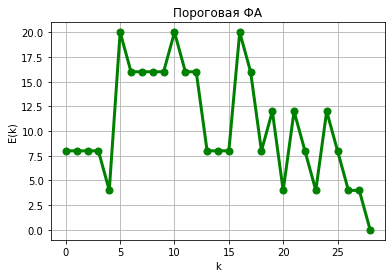



Эпоха = 0 

Синаптические веса = [0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]

Суммарная ошибка :  8


Эпоха = 1 

Синаптические веса = [-0.307849583310995, -0.07696239582774878, -0.07696239582774878, 0.07303760417225122, 0.07303760417225122]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]

Суммарная ошибка :  12


Эпоха = 2 

Синаптические веса = [0.0410303759369153, -0.12637890238026456, -0.12637890238026456, 0.1725483069611643, 0.1725483069611643]
[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]

Суммарная ошибка :  16


Эпоха = 3 

Синаптические веса = [-0.1103683574324788, -0.3131412144635589, -0.1642285857226131, 0.25007492227664396, 0.1001308675062873]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]

Суммарная ошибка :  12


Эпоха = 4 

Синаптические веса = [0.33444057629716684, -0.3501265412072616, -0.20121391246631576, 0.3630858274495179, 0.21314177267916123]
[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0]

Суммарная ошибка :  16


Эпоха = 5 

Синаптич

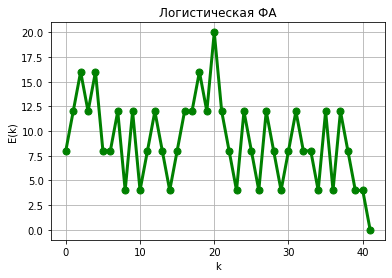

Выходные данные были обрезаны до нескольких последних строк (5000).


Эпоха = 0 

Синаптические веса = [0, 0, 0, 0, 0]
[1, 1, 1, 1]

Суммарная ошибка :  0


Эпоха = 0 

Синаптические веса = [0, 0, 0, 0, 0]
[1, 1, 1, 1]

Суммарная ошибка :  0


Эпоха = 0 

Синаптические веса = [0, 0, 0, 0, 0]
[1, 1, 1, 1]

Суммарная ошибка :  0


Эпоха = 0 

Синаптические веса = [0, 0, 0, 0, 0]
[1, 1, 1, 1]

Суммарная ошибка :  0


Эпоха = 0 

Синаптические веса = [0, 0, 0, 0, 0]
[1, 1, 1, 1]

Суммарная ошибка :  0


Эпоха = 0 

Синаптические веса = [0, 0, 0, 0, 0]
[1, 1, 1, 1]

Суммарная ошибка :  4


Эпоха = 1 

Синаптические веса = [-1.2, -0.3, -0.3, 0.0, 0.0]
[0, 1, 1, 0]

Суммарная ошибка :  4


Эпоха = 2 

Синаптические веса = [1.1102230246251565e-16, -0.3, -0.3, 0.0, 0.3]
[1, 1, 1, 0]

Суммарная ошибка :  0


Эпоха = 0 

Синаптические веса = [0, 0, 0, 0, 0]
[1, 1, 1, 1]

Суммарная ошибка :  4


Эпоха = 1 

Синаптические веса = [-1.2, -0.3, -0.3, 0.0, -0.3]
[0, 1, 0, 1]

Суммарная ошибка :  12


Э

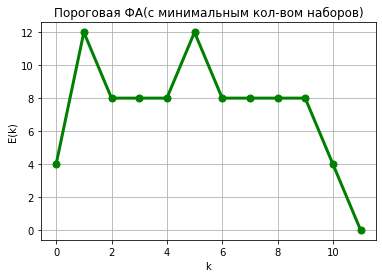



min_x : (array([0, 0, 0, 1], dtype=uint8), array([0, 1, 1, 0], dtype=uint8), array([1, 0, 1, 0], dtype=uint8), array([1, 1, 1, 0], dtype=uint8)) 

w = [2.4, -1.5, -1.2, 0.3, 0.3]


Эпоха = 0 

Синаптические веса = [0, 0, 0, 0, 0]
[]

Суммарная ошибка :  0


Эпоха = 0 

Синаптические веса = [0, 0, 0, 0, 0]
[1]

Суммарная ошибка :  0


Эпоха = 0 

Синаптические веса = [0, 0, 0, 0, 0]
[1]

Суммарная ошибка :  0


Эпоха = 0 

Синаптические веса = [0, 0, 0, 0, 0]
[1]

Суммарная ошибка :  0


Эпоха = 0 

Синаптические веса = [0, 0, 0, 0, 0]
[1]

Суммарная ошибка :  0


Эпоха = 0 

Синаптические веса = [0, 0, 0, 0, 0]
[1]

Суммарная ошибка :  0


Эпоха = 0 

Синаптические веса = [0, 0, 0, 0, 0]
[1]

Суммарная ошибка :  0


Эпоха = 0 

Синаптические веса = [0, 0, 0, 0, 0]
[1]

Суммарная ошибка :  0


Эпоха = 0 

Синаптические веса = [0, 0, 0, 0, 0]
[1]

Суммарная ошибка :  0


Эпоха = 0 

Синаптические веса = [0, 0, 0, 0, 0]
[1]

Суммарная ошибка :  0


Эпоха = 0 

Синаптические веса = [0, 0

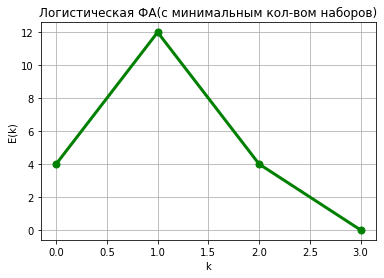



min_x : (array([0, 0, 0, 0], dtype=uint8), array([0, 0, 1, 1], dtype=uint8), array([1, 1, 0, 0], dtype=uint8)) 

w = [0.39667643530238905, -0.2982212040765382, -0.2982212040765382, 0.14559606755675975, 0.14559606755675975]


In [ ]:
if __name__=="__main__":

    X = np.unpackbits(np.array([[j] for j in range(0, pow(2, 4))], dtype=np.uint8), axis=1)[:, 4:]

    E, w = LearningNN(X, Y1, DeltaW1)
    Graph(E, "Пороговая ФА")

    E, w = LearningNN(X, Y2, DeltaW2)
    Graph(E, "Логистическая ФА")

    min_x, w = MinimazeSet(X, Y1, DeltaW1, "Пороговая ФА")
    print("\n\nmin_x :", min_x, "\n\nw =", w)

    min_x, w = MinimazeSet(X, Y2, DeltaW2, "Логистическая ФА")
    print("\n\nmin_x :", min_x, "\n\nw =", w)

#Выводы

В процессе лабораторной работы было исследовано функционирование простейшей нейронной сети на базе нейрона с нелинейной функцией активации и обучение ее по правилу Видроу – Хоффа. Были обучены НС с использованием пороговой и логистической ФА. А также произведено обучение с использованием части комбинаций переменных. В результате, НС с использованием пороговой ФА была быстрее обучена на минимальном количестве наборов, чем на полных наборах. А НС с использованием логистической ФА была, наоборот, обучена за меньшее количество эпох на полных наборах.

**1. Дайте определение персептрон и поясните алгоритм его функционирования.**

Перцептрон — математическая или компьютерная модель восприятия информации мозгом (кибернетическая модель мозга).
Перцептрон состоит из трёх типов элементов, а именно: поступающие от датчиков сигналы передаются ассоциативным элементам, а затем реагирующим элементам.
Таким образом, перцептроны позволяют создать набор «ассоциаций» между входными стимулами и необходимой реакцией на выходе.
Перцептрон классифицируется как простейшая нейронная сеть, позволяющая решать задачу классификации.

**2. Приведите функции активации НС и их производные.**

Функция активации определяет выходное значение нейрона в зависимости от результата взвешенной суммы входов и порогового значения.
Примеры функций активации и их производные:

 * Ступенчатая

$$f(net)= \left\{
\begin{array}{ll}
      1 & net >= 0 \\
      0 & net < 0 \\
\end{array}
\right.$$
***
$$f'(net)= \left\{
\begin{array}{ll}
      ? & net = 0 \\
      0 & net \neq 0 \\
\end{array}
\right.$$

 * Сигмоида (логистическая)

$$f(net) = \dfrac{1}{1 + exp(-net)}$$
***
$$f'(net)=f(net)(1-f(net))$$

 * ReLu

$$f(net)= \left\{
\begin{array}{ll}
      net & net >= 0 \\
      0 & net < 0 \\
\end{array}
\right.$$
***
$$f'(net)= \left\{
\begin{array}{ll}
      net & net >= 0 \\
      0 & net < 0 \\
\end{array}
\right.$$


**3. Сформулируйте правило обучения Видроу — Хоффа.**

Правило обучения Видроу-Хоффа известно под названием дельта-правило.
Пусть вектор $X =x_1,x_2,...x_r,...x_m$ - вектор входных сигналов, а вектор $D =d_1,d_2,...d_r,...d_m$ - вектор сигналов, которые должны быть получены от перцептрона под воздействием входного вектора. $n$ - число нейронов. Полученный вектор выходных значений перцептрона: $Y =y_1,y_2,...y_r,...y_m$. Тогда можно определить вектор ошибки $E =e_1,e_2,...e_r,...e_m$, размерность которого совпадает с размерностью вектора выходных сигналов. Компоненты вектора ошибок определяются как разность между ожидаемым и реальным значением выходного сигнала перцептронного нейрона:

$$ E = D - Y $$

При таких обозначениях формулу для корректировки $j$-го веса $i$-го нейрона можно записать следующим образом:

$$ w_j(t+1) = w_j(t) + e_i x_j $$
